# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [39 lines of output]
  Traceback (most recent call last):
    File "c:\users\jesus\anaconda3\lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
      parsed = parse_requirement(requirement_string)
    File "c:\users\jesus\anaconda3\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
    File "c:\users\jesus\anaconda3\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
      url, specifier, marker = _parse_requirement_details(tokenizer)
    File "c:\users\jesus\anaconda3\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 126, in _parse_requirement_details
      marker = _parse_requirement_marker(
    File "c:\users\jesus\anaconda3\lib\site-packages\setuptools\_vendor\packaging\_pa

In [2]:
!pip list

Package                            Version
---------------------------------- -----------------
absl-py                            1.3.0
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 2.0.3
anaconda-project                   0.9.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.5
astropy                            4.2.1
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5.6
Babel                              2.9.0
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
bac

In [3]:
import tensorflow as tf
import os

lxml                               4.6.3
Markdown                           3.4.1
markdown-it-py                     2.2.0
MarkupSafe                         1.1.1
matplotlib                         3.3.4
mccabe                             0.6.1
mdurl                              0.1.2
menuinst                           1.4.16
mistune                            0.8.4
mkl-fft                            1.3.0
mkl-random                         1.2.1
mkl-service                        2.3.0
mock                               4.0.3
more-itertools                     8.7.0
mpmath                             1.2.1
msgpack                            1.0.2
multipledispatch                   0.6.0
murmurhash                         1.0.9
mypy-extensions                    0.4.3
navigator-updater                  0.2.1
nbclassic                          0.2.6
nbclient                           0.5.3
nbconvert                          6.0.7
nbformat                           5.1.3
nest-asyncio   

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [6]:
import cv2
import imghdr

In [7]:
data_dir = 'data' 

In [8]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [9]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 279 files belonging to 2 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

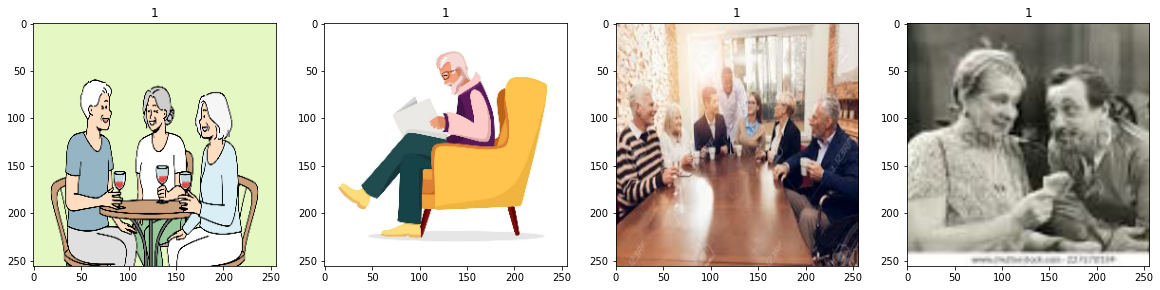

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [15]:
data = data.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [16]:
data.as_numpy_iterator().next()

(array([[[[0.6633885 , 0.71829045, 0.71829045],
          [0.6666667 , 0.72156864, 0.72156864],
          [0.66988355, 0.72478557, 0.72478557],
          ...,
          [0.69411767, 0.7529412 , 0.7411765 ],
          [0.69411767, 0.7529412 , 0.7411765 ],
          [0.69411767, 0.7529412 , 0.7411765 ]],
 
         [[0.6645922 , 0.71949416, 0.71949416],
          [0.6666667 , 0.72156864, 0.72156864],
          [0.66988355, 0.72478557, 0.72478557],
          ...,
          [0.69411767, 0.7529412 , 0.7411765 ],
          [0.69411767, 0.7529412 , 0.7411765 ],
          [0.69411767, 0.7529412 , 0.7411765 ]],
 
         [[0.6664874 , 0.72138935, 0.72138935],
          [0.6666667 , 0.72156864, 0.72156864],
          [0.66988355, 0.72478557, 0.72478557],
          ...,
          [0.69411767, 0.7529412 , 0.7411765 ],
          [0.69411767, 0.7529412 , 0.7411765 ],
          [0.69411767, 0.7529412 , 0.7411765 ]],
 
         ...,
 
         [[0.56531405, 0.62805915, 0.62805915],
          [0.56851

# 5. Split Data

In [17]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [18]:
test_size

1

In [19]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [20]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [22]:
model = Sequential()

In [23]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [24]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [26]:
logdir='logs'

In [27]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [28]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
6/6 [==============================] - 7s 854ms/step - loss: 0.9768 - accuracy: 0.4948 - val_loss: 0.6929 - val_accuracy: 0.5156
Epoch 2/20
6/6 [==============================] - 5s 794ms/step - loss: 0.7018 - accuracy: 0.5677 - val_loss: 0.6430 - val_accuracy: 0.7812
Epoch 3/20
6/6 [==============================] - 5s 793ms/step - loss: 0.6086 - accuracy: 0.7500 - val_loss: 0.6897 - val_accuracy: 0.5469
Epoch 4/20
6/6 [==============================] - 5s 793ms/step - loss: 0.5768 - accuracy: 0.6823 - val_loss: 0.4771 - val_accuracy: 0.7812
Epoch 5/20
6/6 [==============================] - 5s 785ms/step - loss: 0.4875 - accuracy: 0.7500 - val_loss: 0.4805 - val_accuracy: 0.8125
Epoch 6/20
6/6 [==============================] - 5s 782ms/step - loss: 0.4032 - accuracy: 0.8490 - val_loss: 0.3130 - val_accuracy: 0.8750
Epoch 7/20
6/6 [==============================] - 5s 775ms/step - loss: 0.3326 - accuracy: 0.8594 - val_loss: 0.2177 - val_accuracy: 0.9531
Epoch 8/20
6/6 [====

# 8. Plot Performance

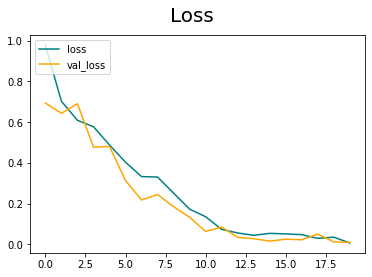

In [29]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

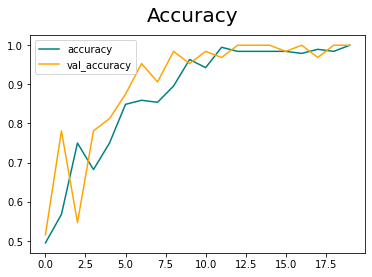

In [30]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [31]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [32]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [33]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 351ms/step


In [34]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


# 10. Test

In [35]:
import cv2

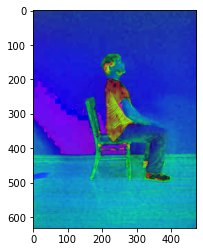

In [47]:
img = cv2.imread('notfallingtest.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))
plt.show()

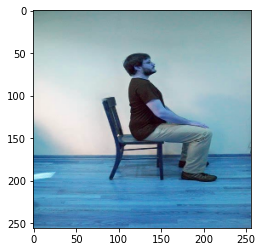

In [48]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))

In [38]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 39ms/step


In [39]:
yhat

array([[0.9674555]], dtype=float32)

In [40]:
if yhat > 0.5: 
    print(f'Predicted class is Not Fall')
else:
    print(f'Predicted class is Fall')

Predicted class is Not Fall


# 11. Save the Model

In [41]:
from tensorflow.keras.models import load_model

In [42]:
model.save(os.path.join('models','imageclassifier.h5'))

In [43]:
os.path.join('models','imageclassifier.h5')

'models\\imageclassifier.h5'

In [44]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))

In [46]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 40ms/step


array([[0.9674555]], dtype=float32)